# Betrand model

The Betrand model is often based on firms competing in an oligopoly (few companies) market with homogeneous products. Where the firms are setting the prices and the consumers are choosing a quantity based on the given price. 

The first part of the project will look at Betrand model with no cooperation between the two firms in the Model. This part will show that two firms set their prices equal to the marginal cost, and are therefor competing under perfect competition with zero profit.   

We have the following assumptions in a Betrand model.

•           At least two firms 

•           Firms produce a homogeneous product and cannot cooperate in any way

•           Prices by the firms are set simultaneously

•           The firms have the same constant marginal cost of c

Secondly will the project look at a situation with collusion (cartel). Here will the two firms cooperate on the market and and set a price higher then the marginal cost. This part will therefor investigate what happen to the profit and welfare under cooperation.


## Libraries and dataset

In [1]:
#First we import the verious packages we use.  
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

### Defining the utility structure



• the consumer can either buy one product or nothing at all

• Consumer type n that buys a product at price p has the valuation n-p

• The outside option is normalized at 0

• The consumer only buys the product on the condition that n-p≥0


### Defining the consumer

In [2]:
# The arrange returns values within a given interval.
# In below code, we return n = 100 consumers as n different types between 0 and 1
consumer_types = arange(0.0,1,0.01) 


### Aggregated demand

In [3]:
# First we define the utility function for the consumer.
# The differnt consumers values the good from the two firms at price n, sold at price p.
def utility(p,n): 
    return n-p

# We now define when consumer n will buy the good based on utility obtained from a purchase.
def buy(p,n):
    if utility(p,n) >= 0:
        buy = 1.0
    else:
        buy = 0.0  # Consumer will not buy if negative utility
    return buy

# Aggregated demand, based on individual utility calculation above.
def agg_demand(p):
    total_demand = [buy(p,n)/len(consumer_types) for n in consumer_types]
    return sum(total_demand)

### Profit function 

In [4]:
# We can now find the profit for firm 1
# c1 determines marginal cost for Firm 1, p1 is price for good sold by Firm 1 and p2 is the price set by Firm 2.
def profit(p1,p2,c1):
    if p1 > p2:
        profits = 0
    elif p1 == p2:
        profits = 0.5*agg_demand(p1)*(p1-c1)
    else:
        profits = agg_demand(p1)*(p1-c1)
    return profits

## Section 1 - Bertrand oligopoly


In order to get the full profit, Firm 1 reacts to the price set by Firm 2, p2.

Here we say that as long as the price set by Firm 2, p2, is higher than the production cost for Firm 1, c1, they will lower their price, p1, in order to get all sales and there by the full profit.

### Reaction functions

In [5]:
# We set the price for Firm 1, p1, at 95% of potential profit (profit=price-cost), if Firm 1 sold at Firm 2's price p2 
# as long as the price is still above marginal cost.
def reaction(p2,c1):
    if p2 > c1:
        reaction = c1+0.95*(p2-c1)
    else:
        reaction = c1
    return reaction

But when Firm 1 lower the price, Firm 2 can no longer sell their good, why they react and then set their price at 95% of firm 1's and so on. The best strategy for each firm is setting the same prices p_1=p_2=p, which will be equal to the marginal cost => perfect competition. 

In [6]:
# Reaction function, as the keep lowering prices.
def all_reaction(p,c0):
    return array(p)-array([reaction(p[1],c0[0]),reaction(p[0],c0[1])])

c0 = [0.2,0.2]    # c1 = c2 = 0,2
p0 = [1, 1]       # initial guess: p1 = p2 = 1

final_price = optimize.fsolve(all_reaction, p0, args = (c0))
print (final_price)

[0.2 0.2]


We find that, when both firms keep lowering their price to go under the other, they end up with both of them selling at cost price. Two firms in Bertrand is therefore said to be enough to get perfectly competitive market.Suppose that the price announced by both firms is above marginal cost. Then firm_i   is not playing a “best response”, because given that firm_j has announced is above marginal cost. A best response will therefor for firm_i is to set a lower price to get all customers but still above or equal to MC. This leads to that the price will be equal marginal cost for both firms at the end, where the outcome will be a Nash equilibrium given both firms has played their best response.




## Section 2 - Cartel
But what if the two firms deside to coorporate and agree on a price, so that they share the market and the profit?
This is called a <em>Cartel</em>, and is something we will look at now. 

### 2.1 Cartel profit function

In [7]:

def cartel_profits(p,c):    # Again we assume symmetry: marginal cost is c1 = c2 = 0.2
    profits = profit(p,p,c)
    
    if p >= c:
        total_profits = agg_demand(p)*(p-c)
    
    else:
        total_profits = 0   # Since the Firm will not produce with negative profit.
        
    return total_profits

### 2.2 The distribution of profits, based on prices

(-0.025, 0.2)

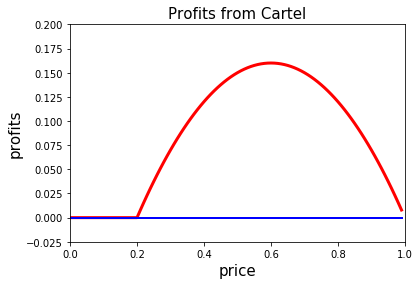

In [8]:
# If the Firms deside to collut and have marginal cost at 0.2, they get the following profit, depending on price.
c = 0.2                     # Symmetry and fixed marginal cost
range_p = arange(0,1,0.01)  # Range of prices between 0 and 1.

range_profits = [cartel_profits(p,c) for p in range_p]
range_c = [(0) for p in range_p]

plt.clf()
plt.plot(range_p, range_profits, color = 'red', linewidth = 3)
plt.plot(range_p, range_c, color = 'blue', linewidth = 2)
plt.title("Profits from Cartel",fontsize = 15)
plt.xlabel("price",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(0,1.0)
plt.ylim(-0.025,0.2)

In [9]:
# Numerical analysis of optimal price/profit lalala
def opt_price(range_p): 
    return  agg_demand(range_p)*(range_p-c)

opt_p = optimize.fmin(lambda range_p: -opt_price(range_p), 0)
print(opt_p)

Optimization terminated successfully.
         Current function value: -0.159950
         Iterations: 25
         Function evaluations: 52
[0.599875]


In the above figure “Profits from cartel” we see two graphs. The red graph indicates the profit for the Cartel and the blue indicates the firms profit when under perfect competition. We find in above code the maximum profit is 0,16 (since it is a minimizer funktion, and we wish to find maximum, the number is negative -0,159950) with a price on 0,6. We see that the cartel profit starts when they set a price over the marginal cost of the product as stated earlier. 

This is proven below.


In [10]:
# Checking that optimnal profit and price are true
c = 0.2
p_optimal = 0.6
profit_optimal = agg_demand(p_optimal)*(p_optimal-c)

print("Profit, when price is 0.6 = ", format(round(profit_optimal, 4)))

Profit, when price is 0.6 =  0.16


## Section 3 - Social welfare

In section 2.2, we saw that firms colluding set the price at 0.6 in order to optimize profit. But this means that only 40% of consumers, n > 0.60, will buy the good. A lot of trade is therefor not made. 

In this section we will determine that this is not efficient, seen from a welfare perspective.


(0.0, 1.0)

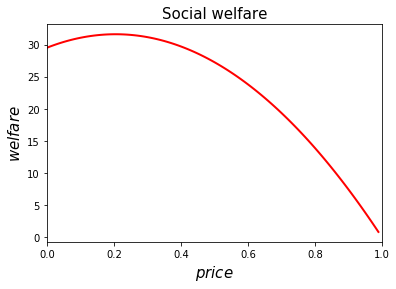

In [11]:
# Here we synthesize the total utility and plot the utility distribution below
def social_welfare(p):
    welfare = sum([utility(c,n)*buy(p,n) for n in consumer_types])
    return welfare

range_w = [social_welfare(p) for p in range_p]

plt.clf()
plt.plot(range_p, range_w,'-', color = 'red', linewidth = 2)
plt.title("Social welfare",fontsize = 15)
plt.xlabel("$price$",fontsize = 15)
plt.ylabel("$welfare$",fontsize = 15)
plt.xlim(0.0,1.0)

We see that optimale welfare, where aggregated consumer utility is highest, is at price = 0.2 = marginal cost. 

We can therefor conclude that cartels are not effecient from a welfare point of view, but rise a profit for Firm in a Bertrand oligapoly, were profit otherwise would be zero, since such oligapoly work as if the market were perfect competition.


In [12]:
# Showing that optimal welfare is at price = 0.2
print(format(round(social_welfare(0.18),5)))
print(format(round(social_welfare(0.20),5)))
print(format(round(social_welfare(0.22),5)))

31.57
31.6
31.59
